In [1]:
from distributed import LocalCluster
from distributed import Client
from extremefill2D.fextreme import init_sim, restart_sim, iterate_sim, multi_init_sim
from extremefill2D.fextreme.plot import vega_plot_treants, vega_plot_treant
import vega
from extremefill2D.fextreme.tools import get_by_uuid, outer_dict
from toolz.curried import map, pipe, curry
import itertools

%reload_ext yamlmagic

In [2]:
try:
    c.close()
except:
    pass

c = LocalCluster(nanny=False)
client = Client('127.0.0.1:8786')

In [3]:
@curry
def pmap(f, data):
    return pipe(
        client.map(f, data),
        map(lambda x: x.result()),
        list
    )

treants = multi_init_sim('scripts/params1.json',
                         'data',
                         pmap,
                         dict(appliedPotential=(-0.16, -0.18, -0.20, -0.22, -0.24, -0.26, -0.28, -0.30),
                              bulkSuppressor=(0.006, 0.012)),
                         tags=['debug', 'test2'])

In [11]:
print(treants)

[<Treant: 'c78e40ea-cc57-4710-b013-f589c0f8937b'>, <Treant: '273026a5-7b7b-4e86-839d-de61383552e3'>, <Treant: '125147ff-79d5-445f-8af7-6aa443d13ebc'>, <Treant: 'beb431cd-5899-4302-90bb-9986b1758c07'>, <Treant: '77494919-4b59-41d8-94dc-5f210b502ae9'>, <Treant: '45bd6734-7e09-447f-adb1-8d83cb37b68c'>, <Treant: 'ce36922c-7514-449f-af5b-3f8bd0b6fc03'>, <Treant: '7987d3ad-697b-4bb4-b9bf-eb84a8f00f4b'>, <Treant: '2d6ff57b-29e6-4ff4-917d-1742c30f5791'>, <Treant: 'c2d1c600-740f-43be-bc9c-c7ebd65b67a8'>, <Treant: '7c380771-c83c-4d29-945e-9a1c922894d7'>, <Treant: '94afa156-935d-4374-a7f4-41a3a3352f64'>, <Treant: '5a0b859c-a359-4bf0-95a7-3480b65f0c47'>, <Treant: 'a0f8c103-6681-4096-b9f2-8f03e0eba754'>, <Treant: '9830cb38-943a-47c2-a860-6606b876fca1'>, <Treant: 'a831481f-933f-4c9a-a14a-085d7da498f5'>]


In [5]:
out = pmap(iterate_sim(iterations=10, steps=10), treants)

/home/wd15/git/extremefill-project/fipy/fipy/variables/unaryOperatorVariable.py:67: RuntimeWarning: overflow encountered in exp
  return self.op(self.var[0].value)
/home/wd15/git/extremefill-project/fipy/fipy/variables/variable.py:1105: RuntimeWarning: invalid value encountered in multiply
  return self._BinaryOperatorVariable(lambda a,b: a*b, other)
/home/wd15/git/extremefill-project/fipy/fipy/variables/variable.py:1086: RuntimeWarning: invalid value encountered in add
  return self._BinaryOperatorVariable(lambda a,b: a+b, other)
/home/wd15/git/extremefill-project/fipy/fipy/variables/variable.py:1180: RuntimeWarning: invalid value encountered in less
  return self._BinaryOperatorVariable(lambda a,b: a<b, other)
/home/wd15/git/extremefill-project/fipy/fipy/variables/variable.py:1262: RuntimeWarning: invalid value encountered in greater_equal
  return self._BinaryOperatorVariable(lambda a,b: a>=b, other)
/home/wd15/git/extremefill-project/fipy/fipy/terms/firstOrderAdvectionTerm.py:147: 

In [9]:
for t, e in out:
    print(t.leaves)

<- View ->
  data/c78e40ea-cc57-4710-b013-f589c0f8937b/Treant.c78e40ea-cc57-4710-b013-f589c0f8937b.json
  data/c78e40ea-cc57-4710-b013-f589c0f8937b/data0000000.nc
  data/c78e40ea-cc57-4710-b013-f589c0f8937b/data0000010.nc
  data/c78e40ea-cc57-4710-b013-f589c0f8937b/data0000020.nc
  data/c78e40ea-cc57-4710-b013-f589c0f8937b/data0000030.nc
  data/c78e40ea-cc57-4710-b013-f589c0f8937b/data0000040.nc
  data/c78e40ea-cc57-4710-b013-f589c0f8937b/params.json
<- ---- ->
<- View ->
  data/273026a5-7b7b-4e86-839d-de61383552e3/Treant.273026a5-7b7b-4e86-839d-de61383552e3.json
  data/273026a5-7b7b-4e86-839d-de61383552e3/data0000000.nc
  data/273026a5-7b7b-4e86-839d-de61383552e3/data0000010.nc
  data/273026a5-7b7b-4e86-839d-de61383552e3/data0000020.nc
  data/273026a5-7b7b-4e86-839d-de61383552e3/data0000030.nc
  data/273026a5-7b7b-4e86-839d-de61383552e3/data0000040.nc
  data/273026a5-7b7b-4e86-839d-de61383552e3/params.json
<- ---- ->
<- View ->
  data/125147ff-79d5-445f-8af7-6aa443d13ebc/Treant.125147

In [14]:
treants[0].glob('*.nc')

<View([<Leaf: 'data/ff161ef0-ac83-4f3f-a40a-01f934bed999/data0000000.nc'>, <Leaf: 'data/ff161ef0-ac83-4f3f-a40a-01f934bed999/data0000010.nc'>, <Leaf: 'data/ff161ef0-ac83-4f3f-a40a-01f934bed999/data0000020.nc'>])>

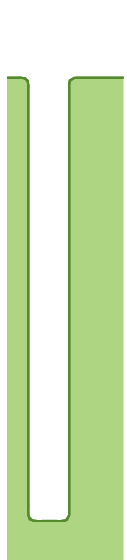

In [10]:
vega_plot_treants([out[0][0]])

In [9]:
import numpy as np
omega = 7.1e-6
n = 2
F = 9.6485e4
R = 8.314
T = 298
alpha = 0.4
Fbar = F / R / T
i0 = 40
eta = -0.4
ee = np.exp(alpha * Fbar * eta) - np.exp(-(2 - alpha) * Fbar * eta)
print(omega * i0 / n / F)
print(ee)

1.4717313572057832e-09
-66719026217.3


In [1]:
import numpy as np

omega = 7.1e-6
n = 2
F = 9.6485e4
R = 8.314
T = 298
alpha = 0.4
Fbar = F / R / T
i0 = 40
eta = -0.25
ee = np.exp(-alpha * Fbar * eta) - np.exp((2 - alpha) * Fbar * eta)
print(i0 * omega / n / F)
print(ee * i0 * omega / n / F)

1.4717313572057832e-09
7.22965473284e-08


In [2]:
50 * omega / n / F

1.8396641965072292e-09

In [3]:
print(ee)

49.1234673872


In [4]:
print(50 * omega / n / F)

1.8396641965072292e-09


In [5]:
print(1.65e-9 * n * F / omega)

44.845140845070425


In [6]:
print(3.67e-12 * n * F / omega)

0.09974646478873239


In [2]:
import os
from extremefill2D.fextreme.tools import base_path
from extremefill2D.fextreme import init_sim, iterate_sim

x = os.path.join(base_path(), 'scripts', 'params.json')
x = init_sim(x, data_path='data')
iterate_sim(x, iterations=1, steps=10)

ValueError: Must use a path or a list of paths